In [1]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.0


In [2]:
import sys
print(sys.executable)

C:\Users\pahadian\Anaconda3\python.exe


In [39]:
import urllib.request

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
filename = "data.zip" 

urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x23c8b5b1490>)

In [3]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('dataCaption') 


In [4]:
x = []
y = []
datadir = 'dataa/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

6821
6821
labels : ['8', '9', '5', '7', 'fraction', '1', '3', '6', '4', '0', '2']


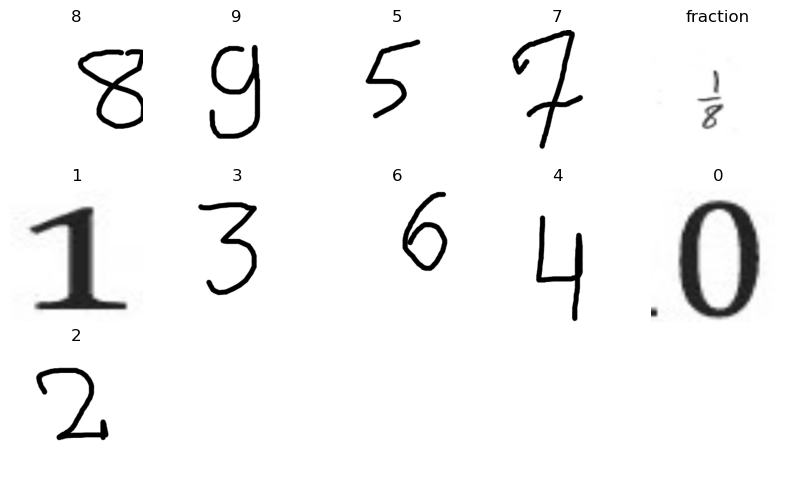

In [5]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

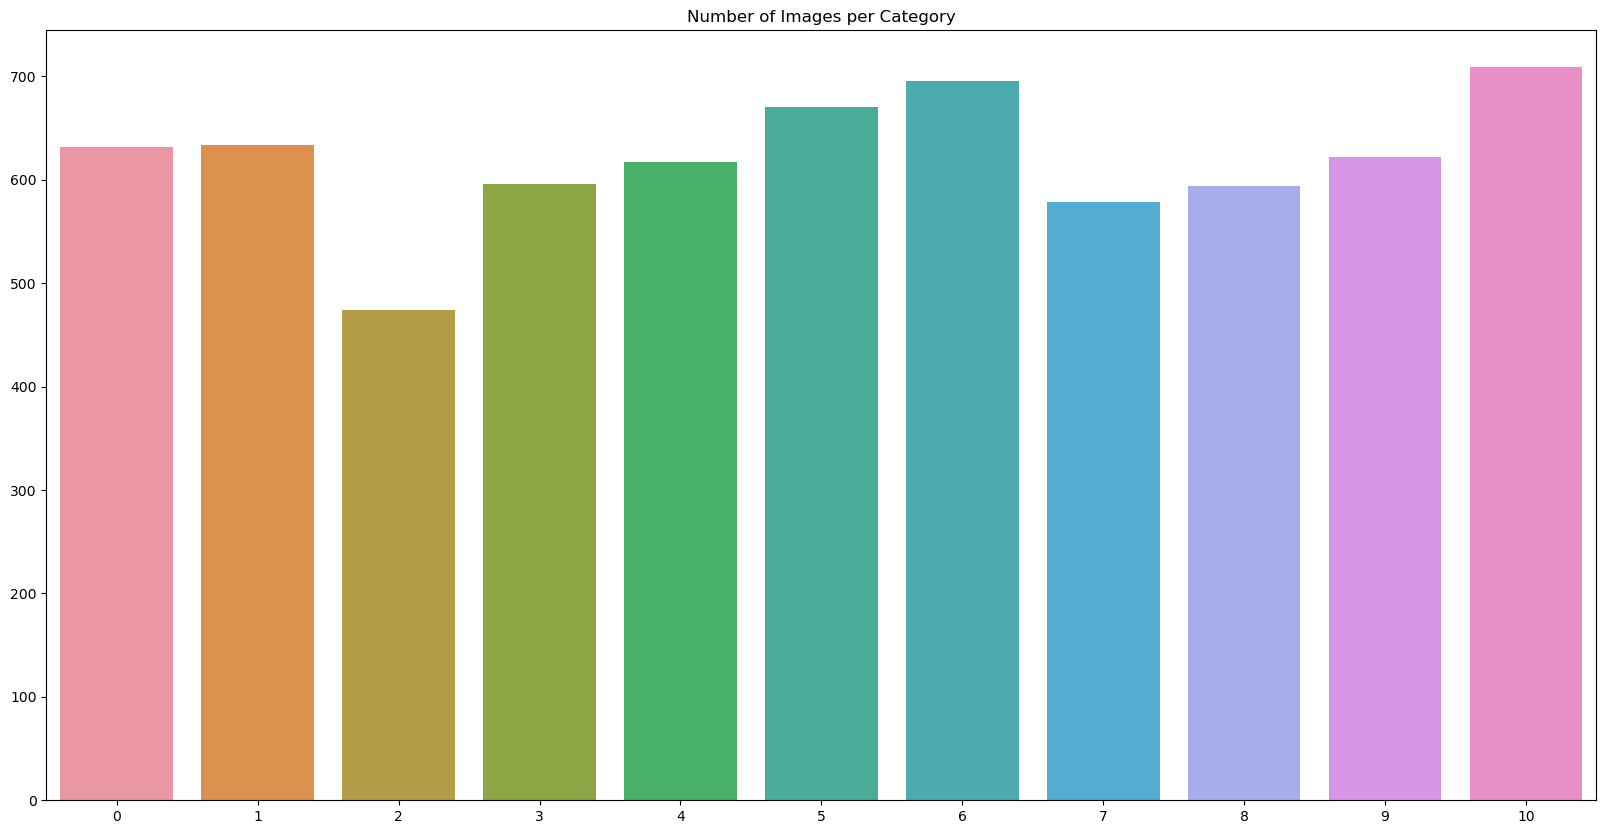

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique, y=count).set_title('Number of Images per Category')
plt.show()

In [8]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))


6821


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

6821


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

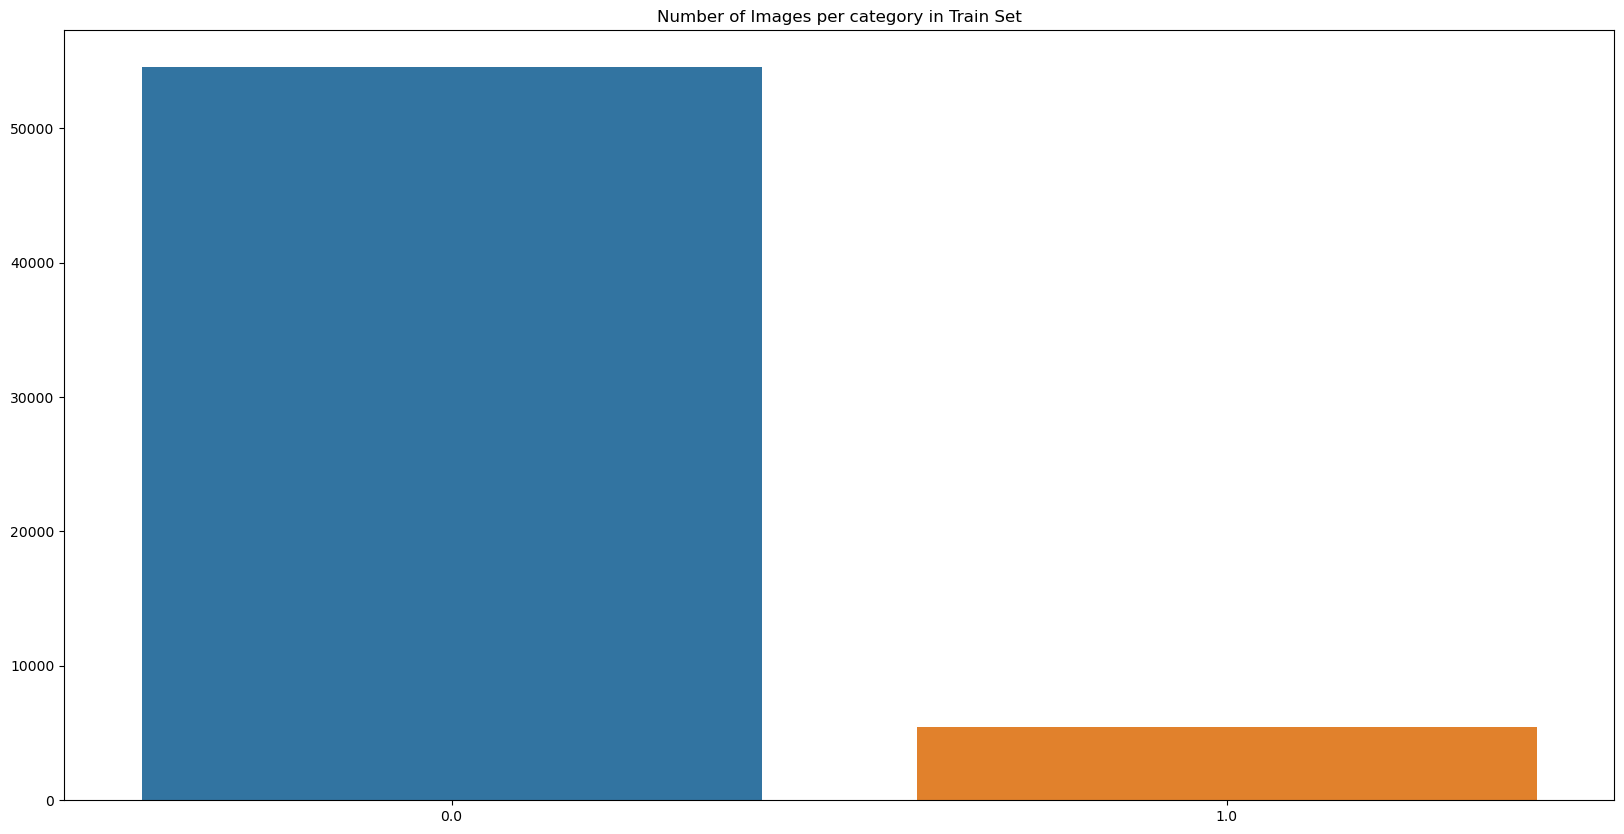

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count_train).set_title('Number of Images per category in Train Set')
plt.show()

In [12]:
!pip install tensorflow
import tensorflow as tf

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [14]:
!pip install tensorflow
import tensorflow as tf
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5456, 32, 32, 1)
(1365, 32, 32, 1)
(5456, 11)
(1365, 11)


In [15]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(11, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [16]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

In [17]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [18]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test, Y_test))
#hist2 = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/100
43/43 [==============================] - 5s 86ms/step - loss: 2.7543 - accuracy: 0.1475 - val_loss: 2.5766 - val_accuracy: 0.2205
Epoch 2/100
43/43 [==============================] - 3s 75ms/step - loss: 2.0007 - accuracy: 0.4278 - val_loss: 1.6033 - val_accuracy: 0.6234
Epoch 3/100
43/43 [==============================] - 3s 60ms/step - loss: 1.4202 - accuracy: 0.6147 - val_loss: 1.3518 - val_accuracy: 0.6806
Epoch 4/100
43/43 [==============================] - 3s 74ms/step - loss: 1.1396 - accuracy: 0.7148 - val_loss: 1.2700 - val_accuracy: 0.6901
Epoch 5/100
43/43 [==============================] - 3s 75ms/step - loss: 0.9833 - accuracy: 0.7566 - val_loss: 0.9162 - val_accuracy: 0.8227
Epoch 6/100
43/43 [==============================] - 3s 80ms/step - loss: 0.8964 - accuracy: 0.7837 - val_loss: 0.9802 - val_accuracy: 0.7817
Epoch 7/100
43/43 [==============================] - 3s 60ms/step - loss: 0.7939 - accuracy: 0.8141 - val_loss: 0.9251 - val_accuracy: 0.7897
Epoch 

43/43 [==============================] - 4s 94ms/step - loss: 0.1555 - accuracy: 0.9674 - val_loss: 0.1729 - val_accuracy: 0.9736
Epoch 59/100
43/43 [==============================] - 3s 67ms/step - loss: 0.1377 - accuracy: 0.9758 - val_loss: 0.1923 - val_accuracy: 0.9678
Epoch 60/100
43/43 [==============================] - 3s 69ms/step - loss: 0.1321 - accuracy: 0.9753 - val_loss: 0.1635 - val_accuracy: 0.9744
Epoch 61/100
43/43 [==============================] - 3s 72ms/step - loss: 0.1388 - accuracy: 0.9705 - val_loss: 0.1698 - val_accuracy: 0.9722
Epoch 62/100
43/43 [==============================] - 4s 84ms/step - loss: 0.1589 - accuracy: 0.9663 - val_loss: 0.1820 - val_accuracy: 0.9758
Epoch 63/100
43/43 [==============================] - 4s 85ms/step - loss: 0.1463 - accuracy: 0.9701 - val_loss: 0.1708 - val_accuracy: 0.9766
Epoch 64/100
43/43 [==============================] - 3s 70ms/step - loss: 0.1360 - accuracy: 0.9745 - val_loss: 0.1672 - val_accuracy: 0.9788
Epoch 65/100

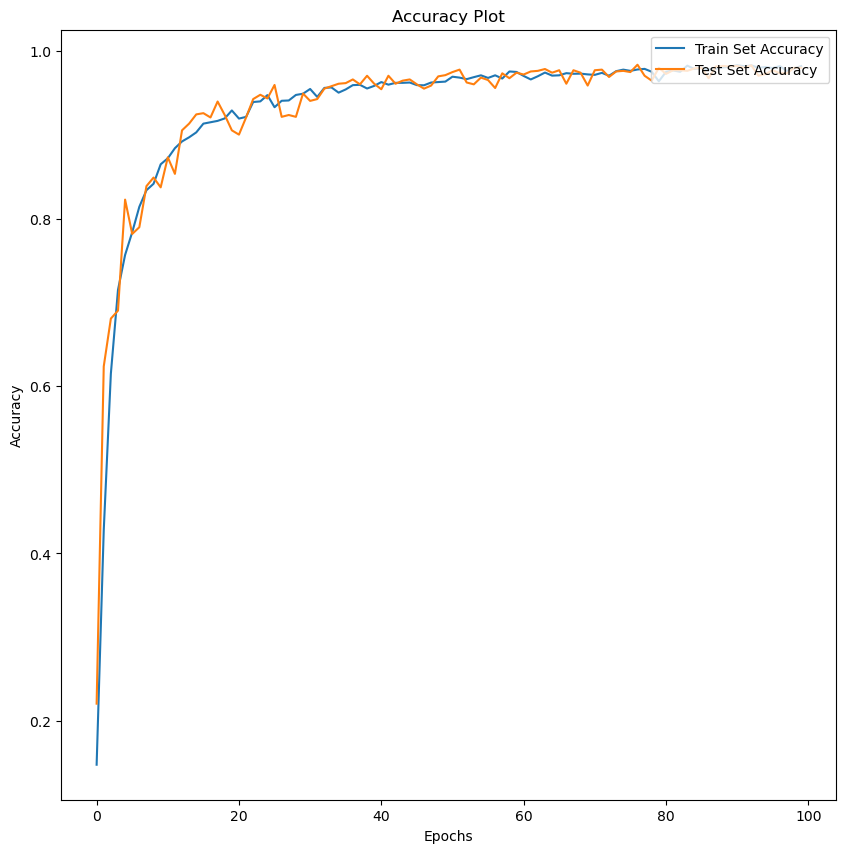

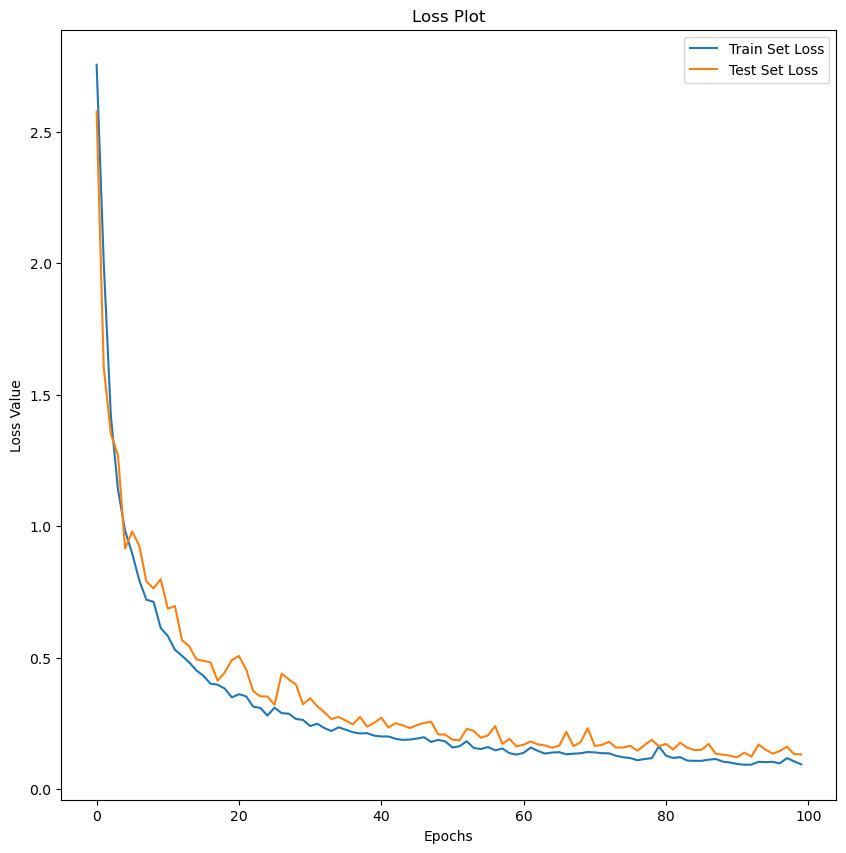

In [19]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [20]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))



43/43 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       1.00      0.95      0.97       129
           2       0.99      0.99      0.99       111
           3       0.99      0.99      0.99       117
           4       0.99      0.96      0.98       127
           5       0.98      0.98      0.98       128
           6       0.96      0.99      0.97       136
           7       0.96      0.97      0.97       116
           8       0.98      0.98      0.98       118
           9       0.95      1.00      0.98       125
          10       0.99      1.00      1.00       137

    accuracy                           0.98      1365
   macro avg       0.98      0.98      0.98      1365
weighted avg       0.98      0.98      0.98      1365



In [21]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'fraction']
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw)/2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [46]:
#Second Version
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'fraction']
    detected_labels = []  # create an empty list to store the labels of detected objects

    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20 <= w and 30 <= h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw) / 2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded / 255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            detected_labels.append(label)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return detected_labels  # return the list of detected labels

1/1 [==============================] - 0s 22ms/step


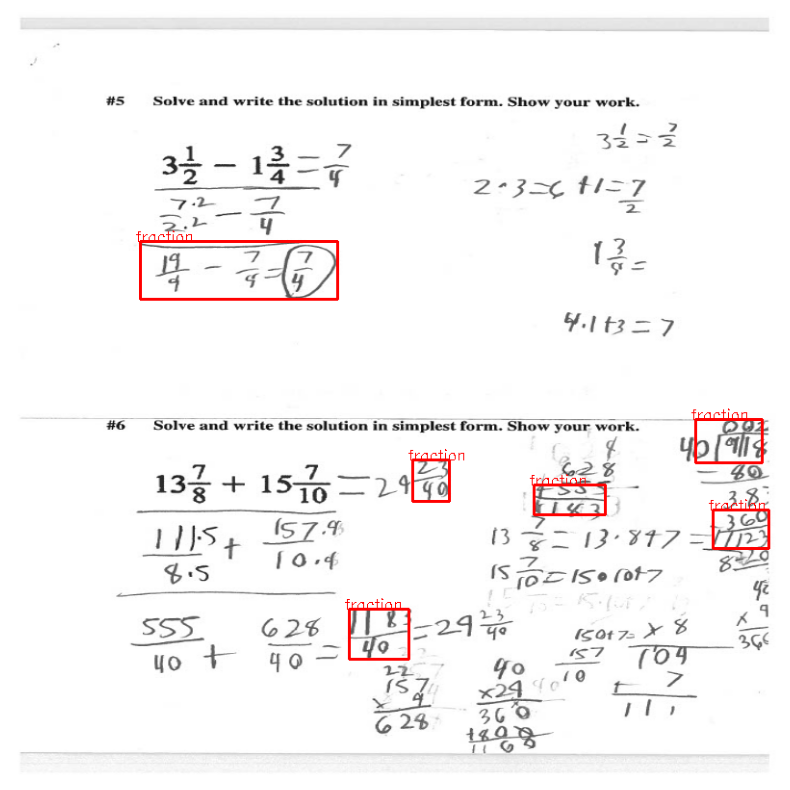

Number of fraction objects: 6


In [47]:
# run object detection
detected_labels = test_pipeline('multi.jpg')

# count how many 'fraction' labels
fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 44ms/step


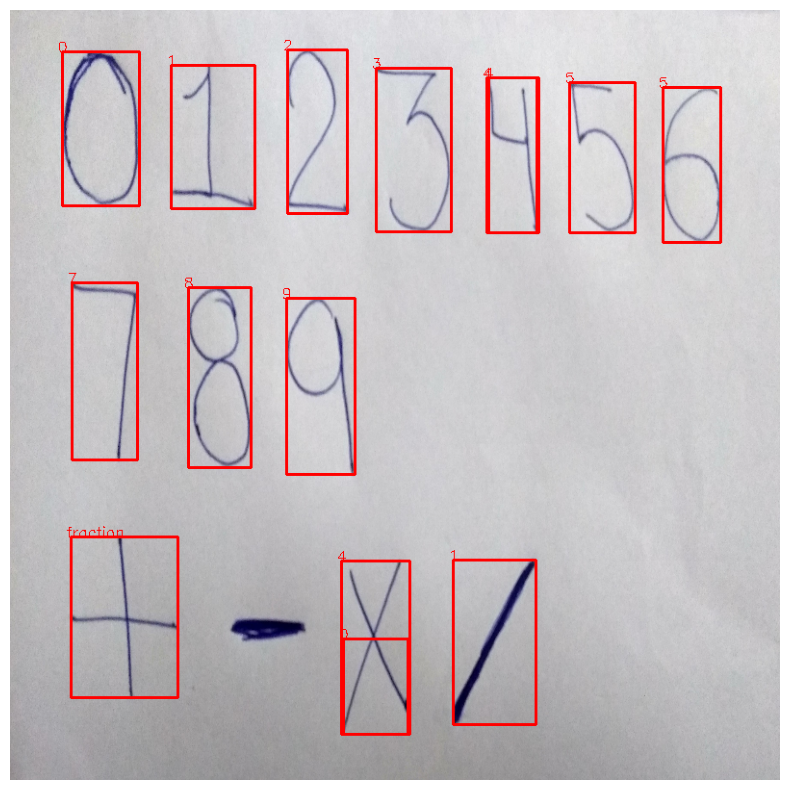

data/test.jpg


In [22]:
test_pipeline('data/test.jpg')
print('data/test.jpg')

1/1 [==============================] - 0s 168ms/step


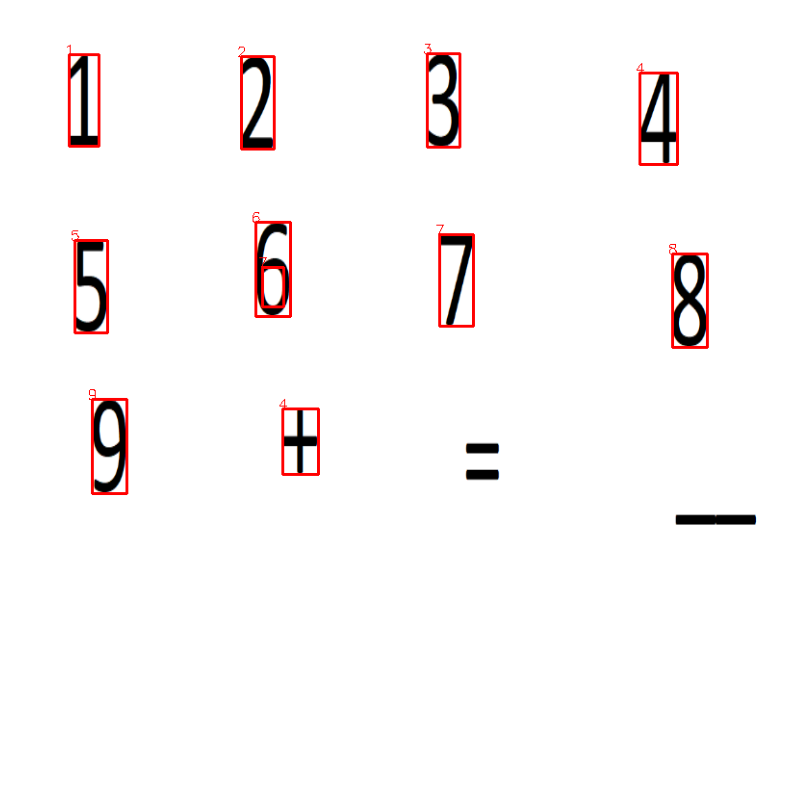

tt.png


In [23]:
test_pipeline('tt.png')
print('tt.png')

1/1 [==============================] - 0s 32ms/step


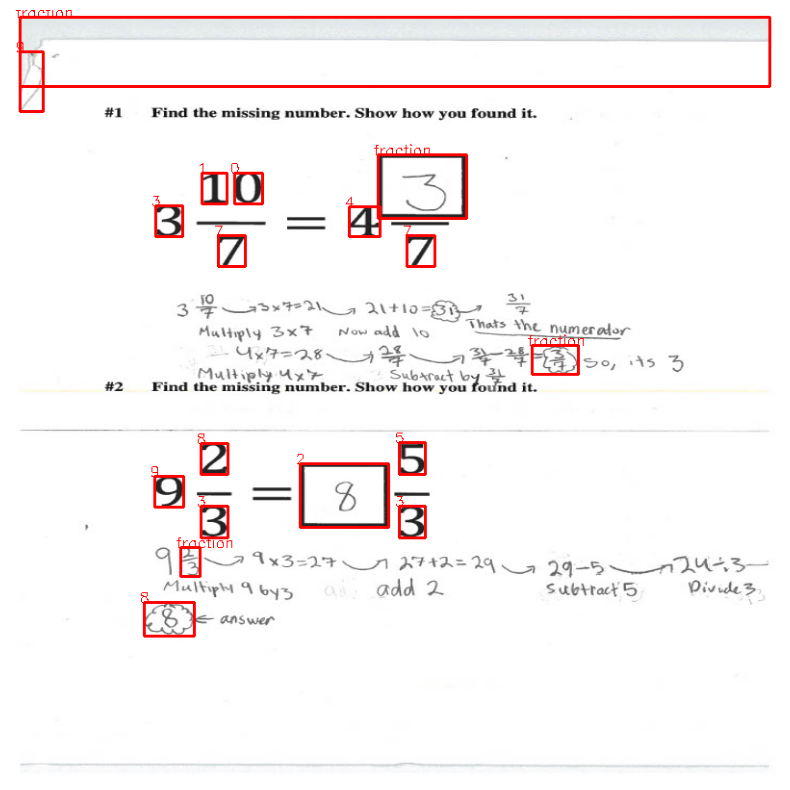

In [24]:
test_pipeline('data/5.jpg')

1/1 [==============================] - 0s 29ms/step


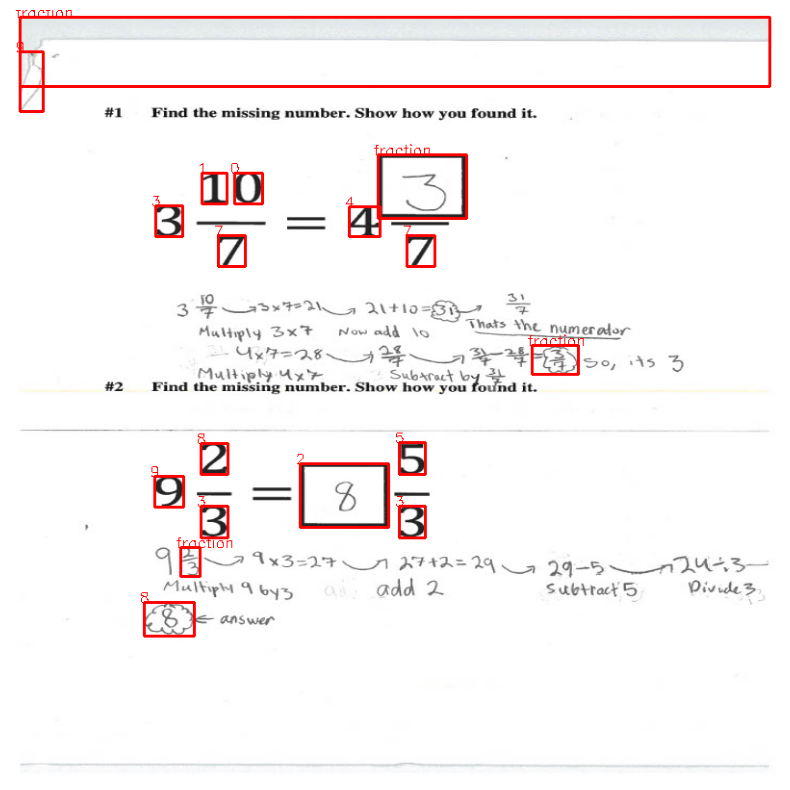

In [25]:
test_pipeline('6.jpg')

1/1 [==============================] - 0s 26ms/step


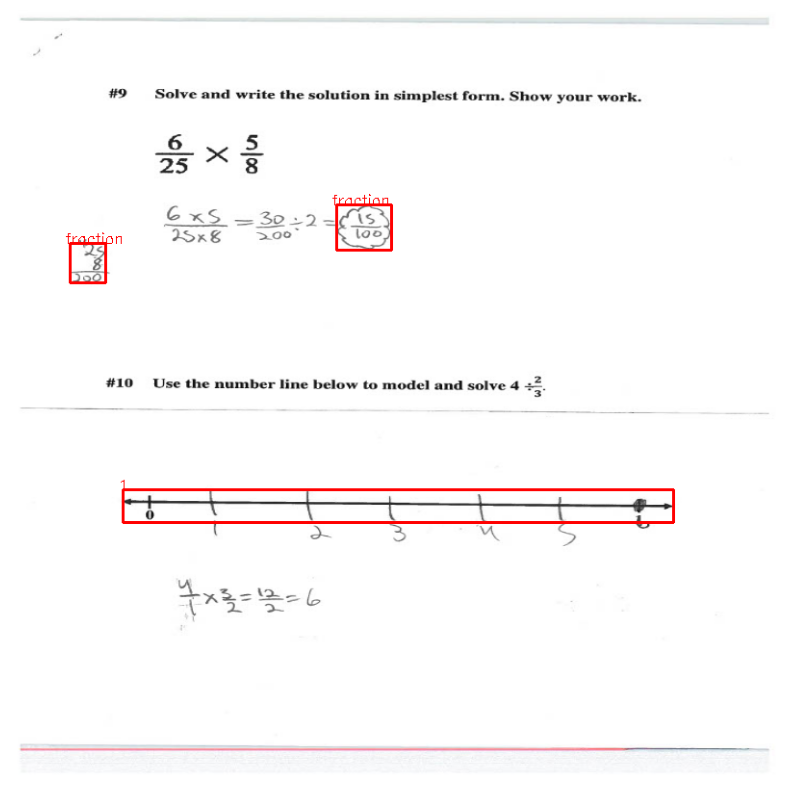

In [26]:
test_pipeline('mul.jpg')

1/1 [==============================] - 0s 27ms/step


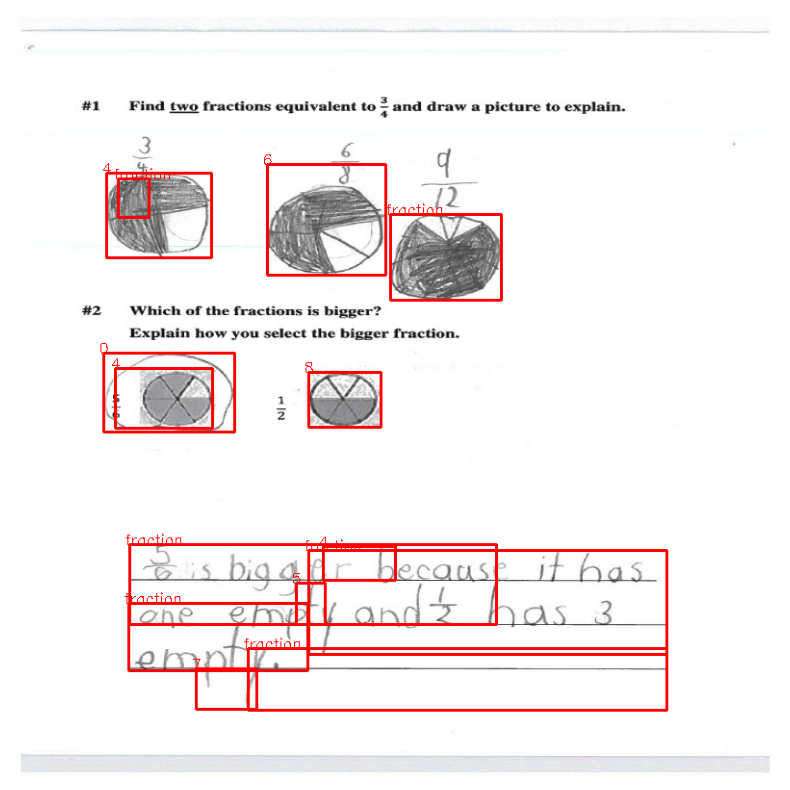

In [27]:
test_pipeline('shape.jpg')

1/1 [==============================] - 0s 26ms/step


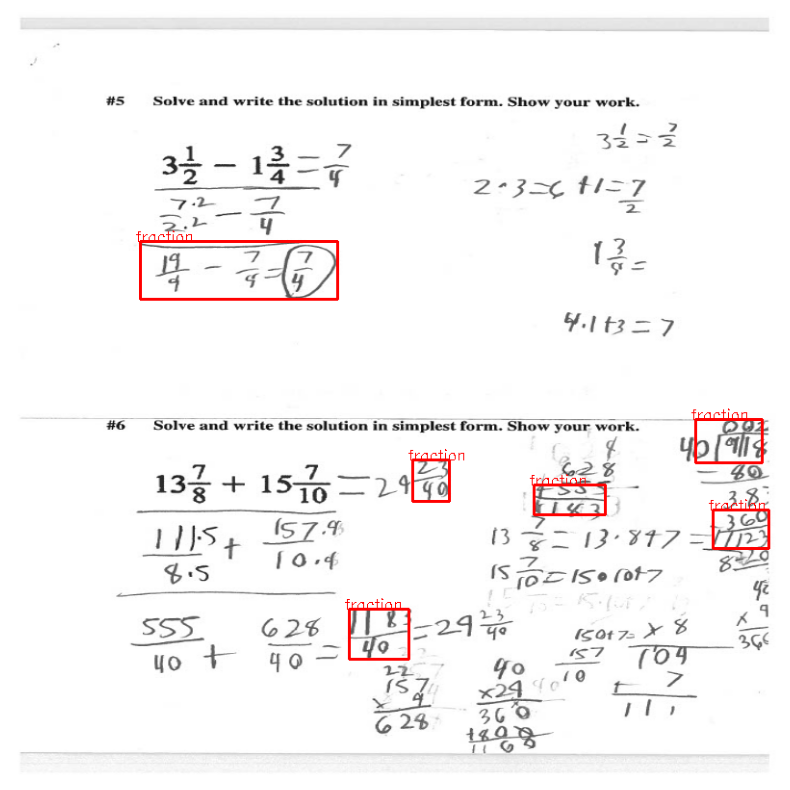

In [28]:
test_pipeline('multi.jpg')

1/1 [==============================] - 0s 16ms/step


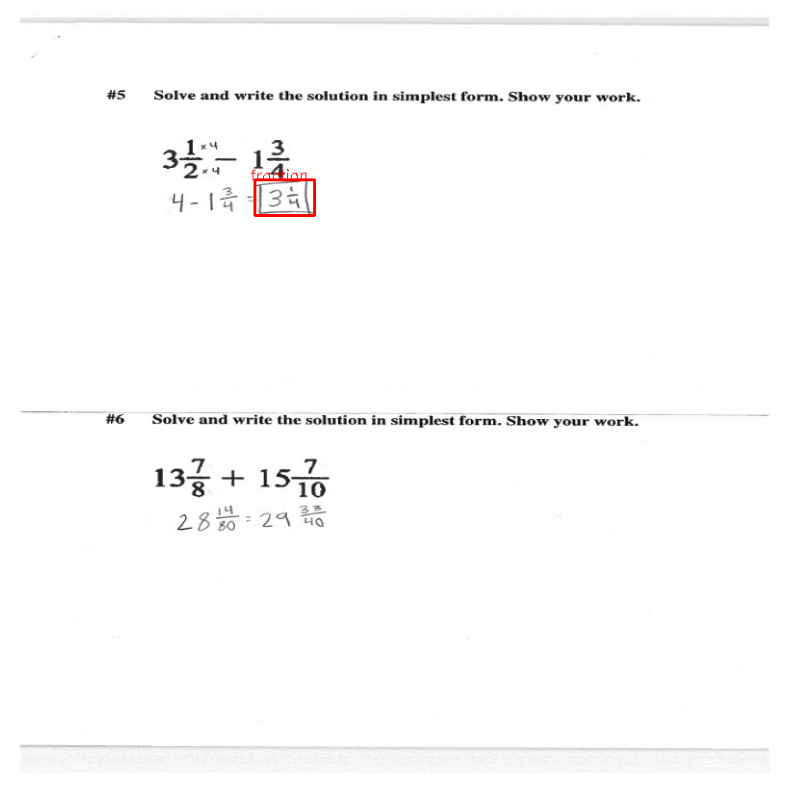

In [29]:
test_pipeline('c.jpg')

1/1 [==============================] - 0s 21ms/step


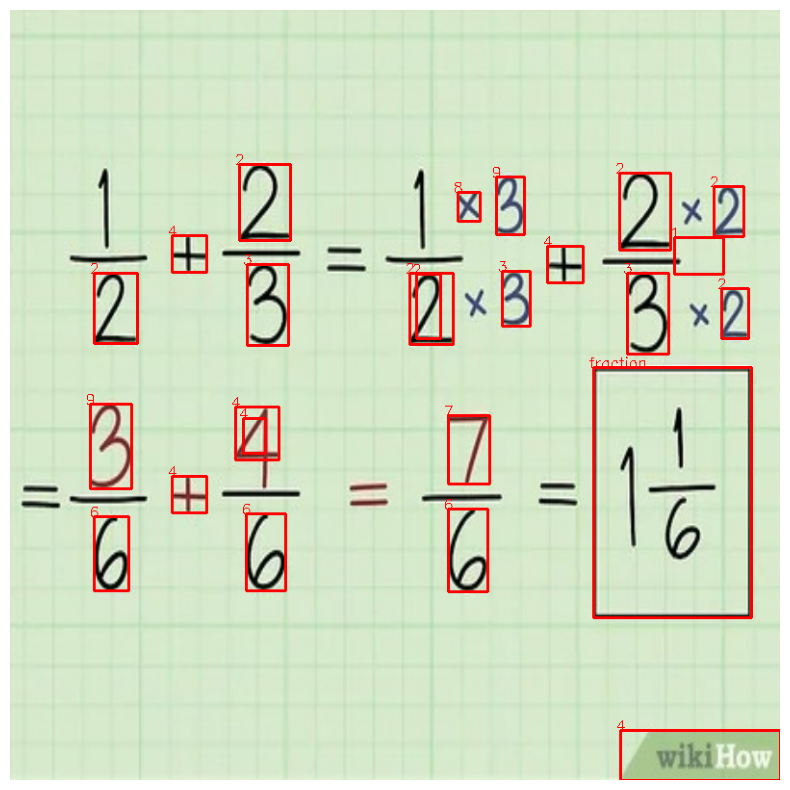

In [30]:
test_pipeline('rightanswer.jpg')

1/1 [==============================] - 0s 20ms/step


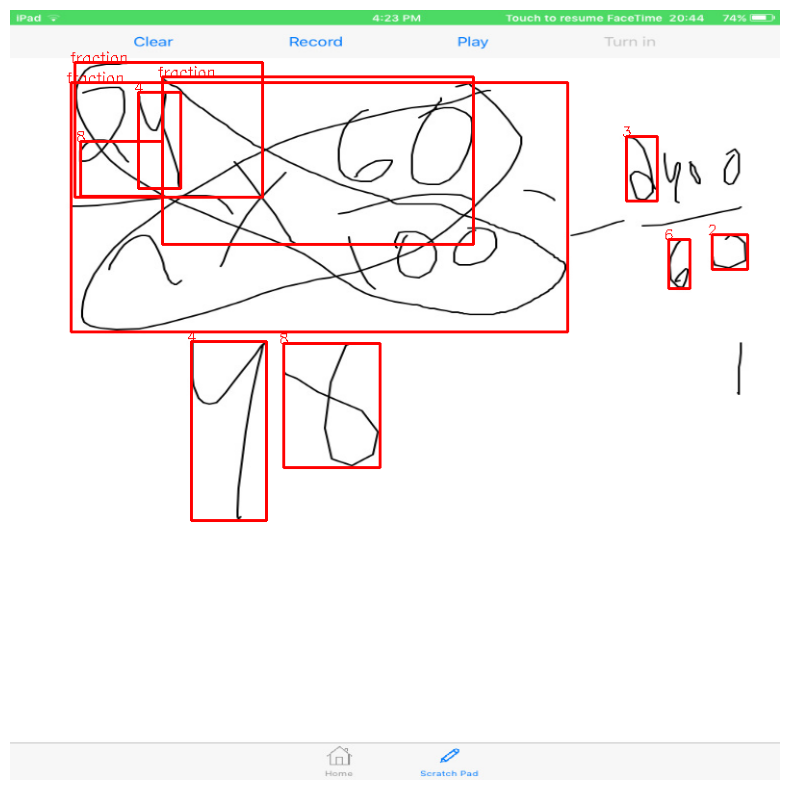

In [31]:
test_pipeline('85785.jpg')

1/1 [==============================] - 0s 23ms/step


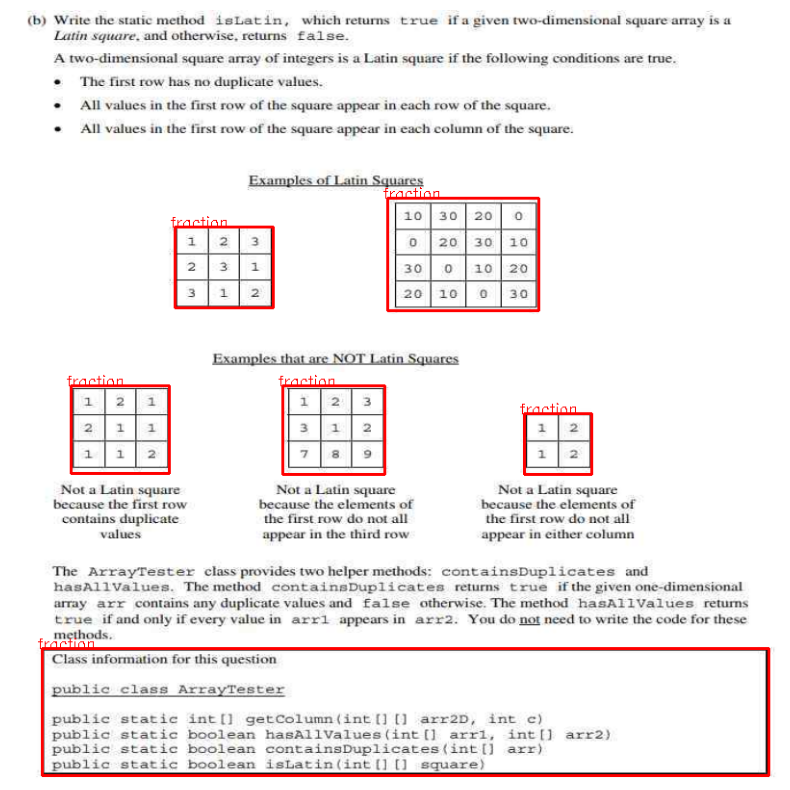

In [32]:
test_pipeline('256992.jpg')

1/1 [==============================] - 0s 18ms/step


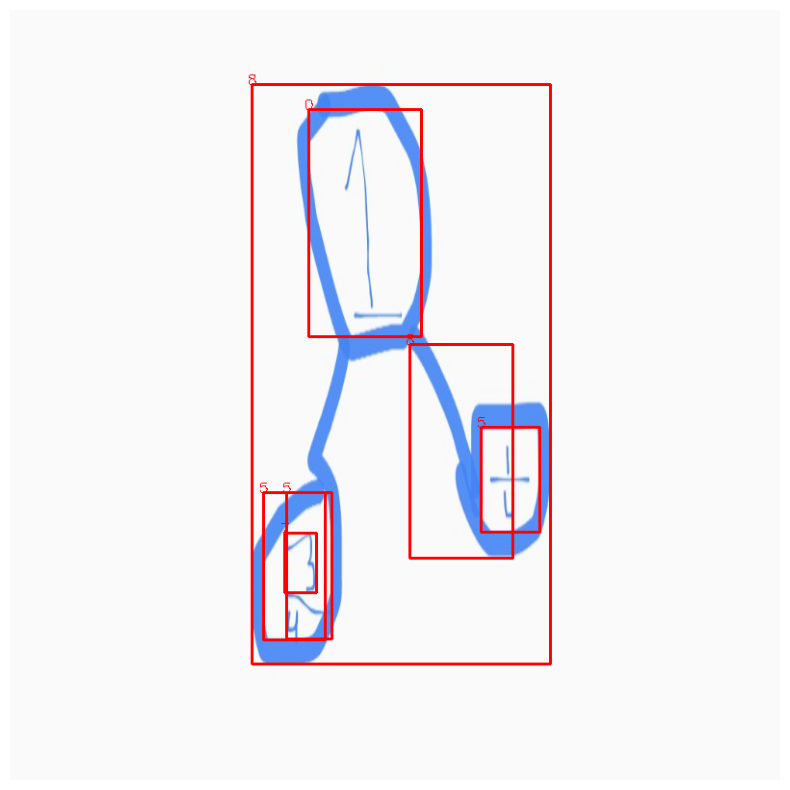

In [33]:
test_pipeline('1b0e83f0-b4cb-4deb-88ec-dd984b8bf10c.jpeg')

1/1 [==============================] - 0s 26ms/step


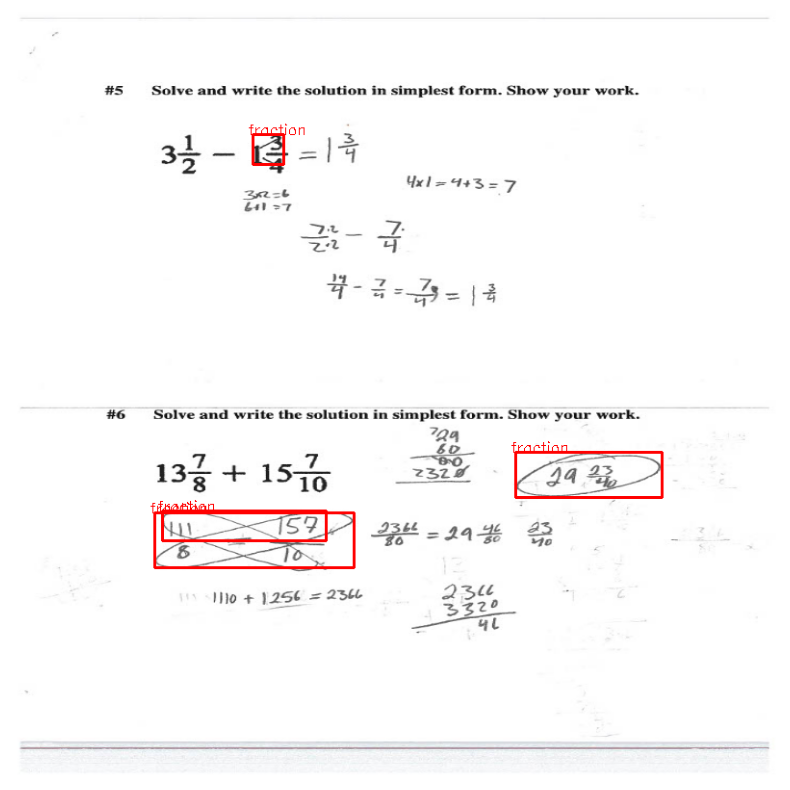

In [34]:
test_pipeline('Grade6_sample11024_9.jpg')

1/1 [==============================] - 0s 23ms/step


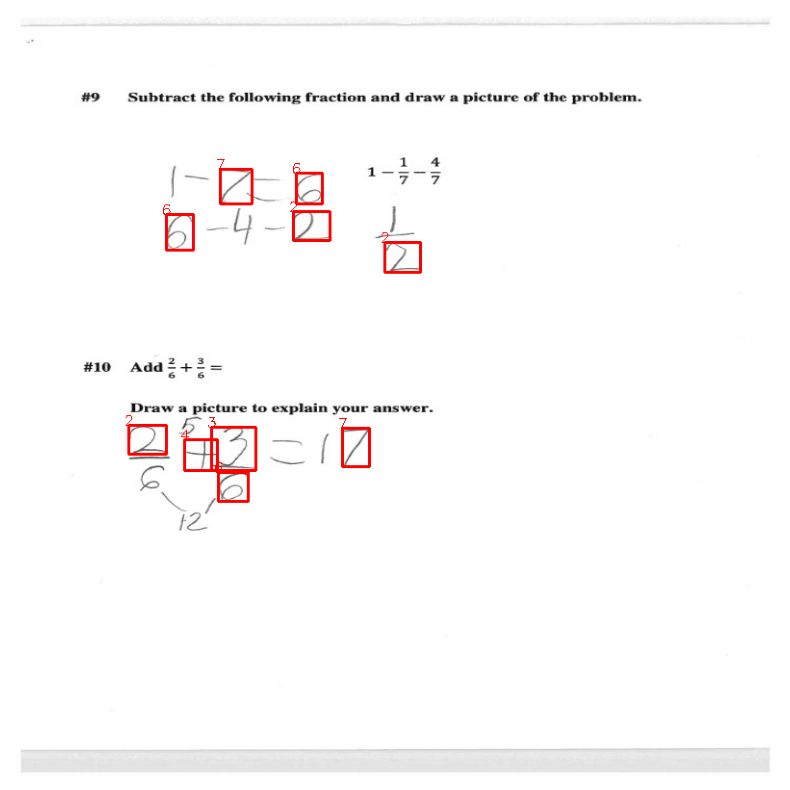

In [35]:
test_pipeline('Grade 3_sample11024_59.jpg')

1/1 [==============================] - 0s 20ms/step


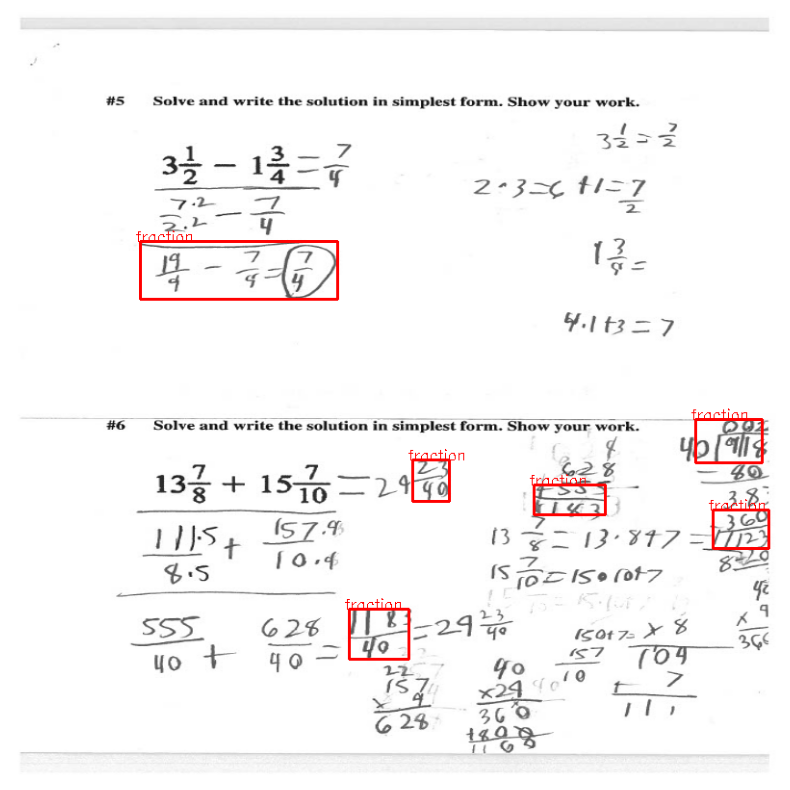

No objects were detected.


In [40]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'fraction']
detected_objects = test_pipeline('multi.jpg')
if detected_objects is not None:
    specific_label = 'fraction'  
    count = sum(1 for obj in detected_objects if obj['label'] == specific_label)

    print(f"Number of {specific_label} objects: {count}")
else:
    print("No objects were detected.")


In [ ]:
#**segmentation part**

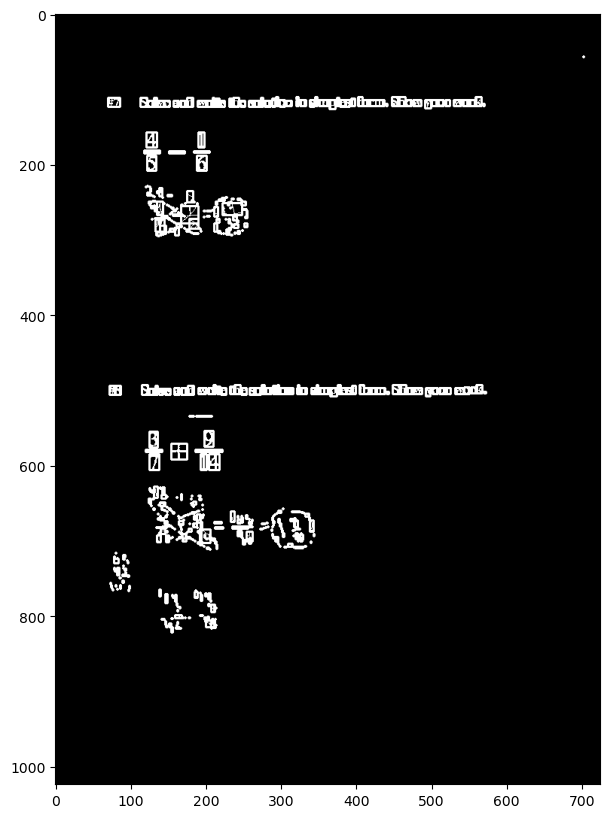

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('testt.jpg', 0)

# Threshold the image
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort the bounding boxes from top-to-bottom (and left-to-right within the same line)
bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[1]//20, box[0]))

# Draw bounding boxes around each component
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with Matplotlib
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.show()


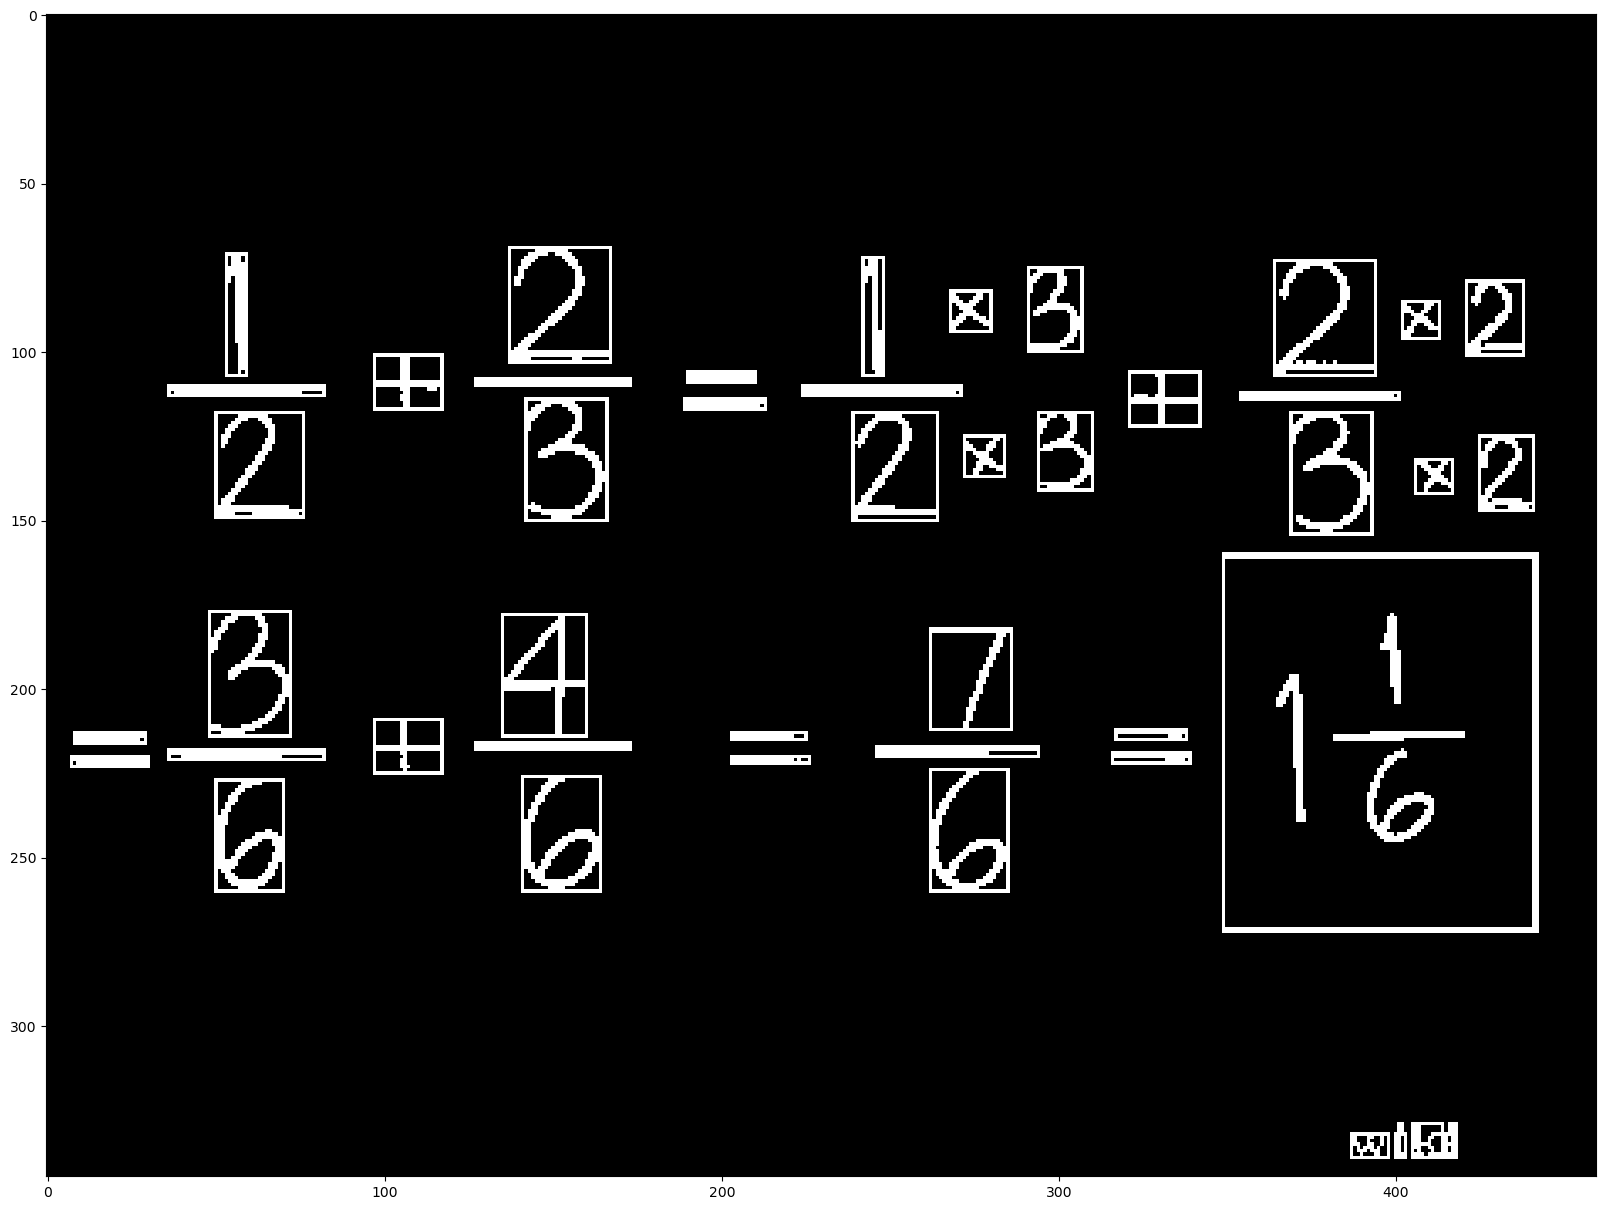

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('rightanswer.jpg', 0)

# Threshold the image
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort the bounding boxes from top-to-bottom (and left-to-right within the same line)
bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[1]//20, box[0]))

# Draw bounding boxes around each component
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Display the image with Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(image, cmap='gray')
plt.show()


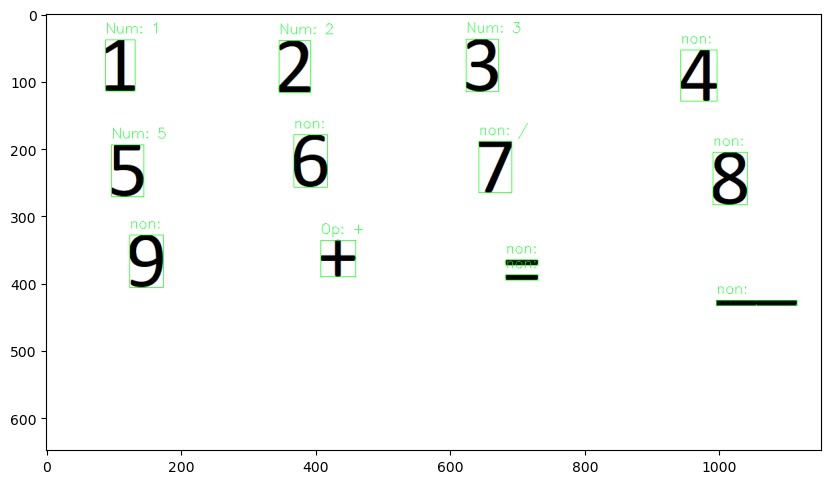

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Set the path for tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Load the image
image = cv2.imread('tt.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort the bounding boxes from top-to-bottom (and left-to-right within the same line)
bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[1]//20, box[0]))

# Draw bounding boxes around each component and resize
for box in bounding_boxes:
    x, y, w, h = box
    segment = binary[y:y+h, x:x+w]
    upscale_size = (w, h)
    resized = cv2.resize(segment, upscale_size, interpolation = cv2.INTER_CUBIC)

    # Perform OCR on the resized segments
    # we are assuming each segment is a single character
    text = pytesseract.image_to_string(resized, config='--psm 10 digits -c tessedit_char_whitelist=0123456789+-=/.').strip()

    # Classify and label the recognized text
    label = "non"
    if text.isdigit():
        label = "Num"
    elif text in ['+', '-', '=', '__']:
        label = "Op"

    # Draw the label on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    cv2.putText(image, f"{label}: {text}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 1)

# Display the labeled image

plt.figure(figsize=(10,10))  # size in inches
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
